<a href="https://colab.research.google.com/github/princeKike27/Endangered-Species-in-US-National-Parks/blob/main/biodiversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Endangered Species in US National Parks

For this project I will analyze data from the National Parks Service about endangered species in different parks. In that sense, I will identify if there are any patterns in the types of species that become endangered. 

In [1]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Observations DataSet

In [3]:
# load observation dataset
df_observations = pd.read_csv('https://raw.githubusercontent.com/princeKike27/Endangered-Species-in-US-National-Parks/main/observations.csv')
df_observations.head()


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [15]:
# df shape
df_observations.shape

(23296, 3)

In [9]:
# check column types
df_observations.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

In [44]:
# descriptive statistics of observations column
df_observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


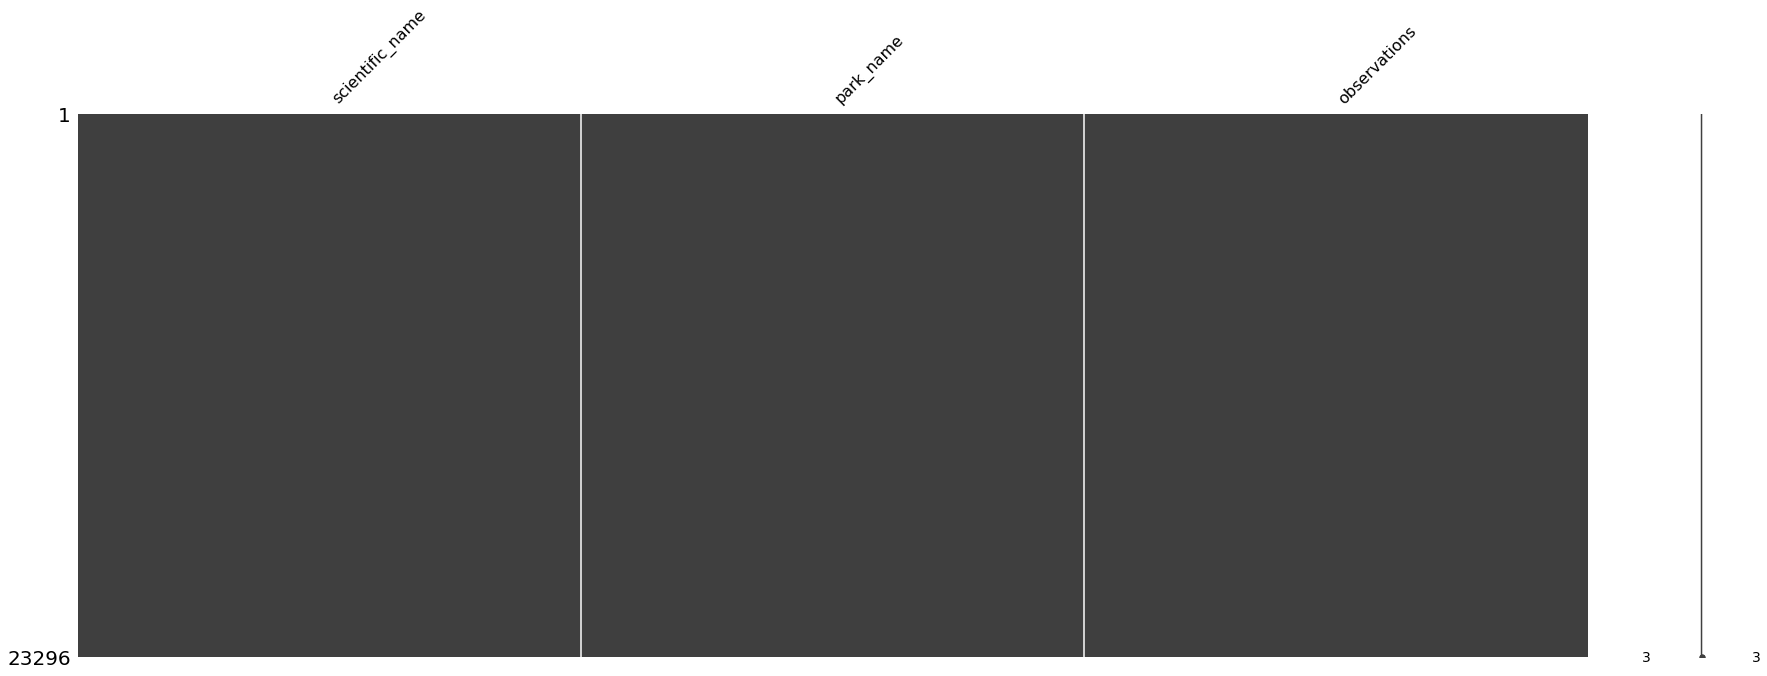

In [10]:
# check for missing values
import missingno as msg

msg.matrix(df_observations, figsize=(30,10))

In [22]:
# check unique values of park_name
parks = list(df_observations['park_name'].unique())
parks

['Great Smoky Mountains National Park',
 'Yosemite National Park',
 'Bryce National Park',
 'Yellowstone National Park']

In [21]:
# check unique values of scientific_name
print(df_observations['scientific_name'].unique())
print(f"Unique Species: {len(df_observations['scientific_name'].unique())}")

['Vicia benghalensis' 'Neovison vison' 'Prunus subcordata' ...
 'Ranunculus hebecarpus' 'Gulo gulo' 'Dichanthelium depauperatum']
Unique Species: 5541


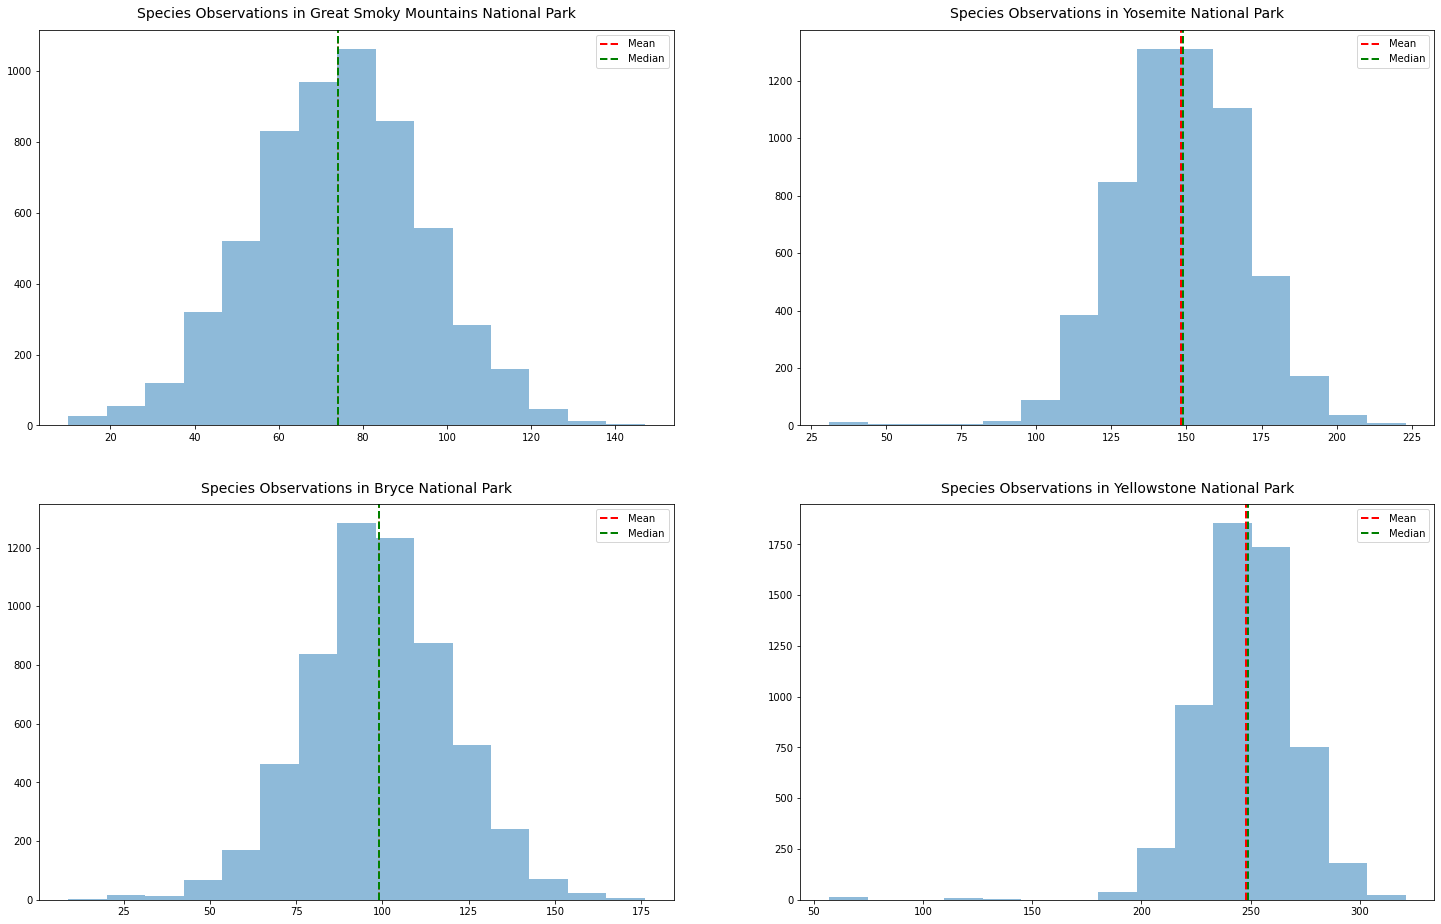

In [46]:
# Histogram of Observations per National Park

# variable to store plot counter
n = 1

fig = plt.figure(figsize=(25, 16))

# plot histograms
for el in parks:
  ax = plt.subplot(2, 2, n)
  # store information of park
  df_park = df_observations[df_observations['park_name'] == el]

  plt.hist(df_park['observations'], bins=15, alpha=0.5)
  plt.axvline(df_park['observations'].mean(), linestyle='dashed', linewidth=2, color='red', label='Mean')
  plt.axvline(df_park['observations'].median(), linestyle='dashed', linewidth=2, color='green', label='Median')

  plt.legend()
  plt.title(f'Species Observations in {el}', fontsize=14, pad=12)
  n += 1

plt.show()

  


In [ ]:
# boxplot of observations per species



# Species_Info Dataset

In [8]:
# load specie_info dataset
df_species_info = pd.read_csv('https://raw.githubusercontent.com/princeKike27/Endangered-Species-in-US-National-Parks/main/species_info.csv')
df_species_info.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
